## Below: HR Diagram
* Color
    - BP-RP
* Luminosity
    - (m-M) = 5log(d)-5

I decided to use the pleiades data from a parallax of 6.2 to 12.5 milliarcseconds because this would give me both stars on the cluster as well as a few off of it and I could see the difference.

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

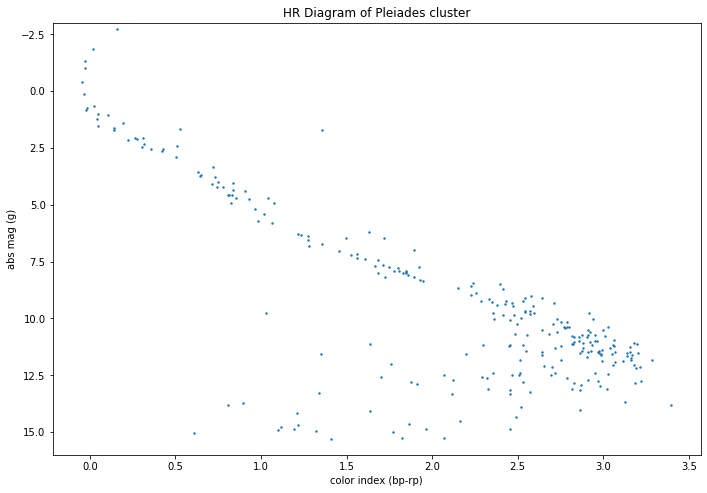

In [2]:
#color bp_rp
# x-axis pleiades_half['bp_rp']

#luminosity = absolute magnitude
def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 23.65 and 24.65 AND
#parallax > 6.2 AND parallax <= 12.5

pleiades_half = pd.read_csv("pleiades6.2-12.5.csv")
pleiades_half.loc[:, 'parallax_arcsec'] = pleiades_half['parallax'].apply(lambda x: x*.001)
pleiades_half.loc[:, 'R'] = pleiades_half['parallax_arcsec'].apply(distance)
pleiades_half.loc[:, 'magnitude'] = pleiades_half.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
#pleiades_half.head(10)
plt.scatter(pleiades_half['bp_rp'], pleiades_half['magnitude'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of Pleiades cluster')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

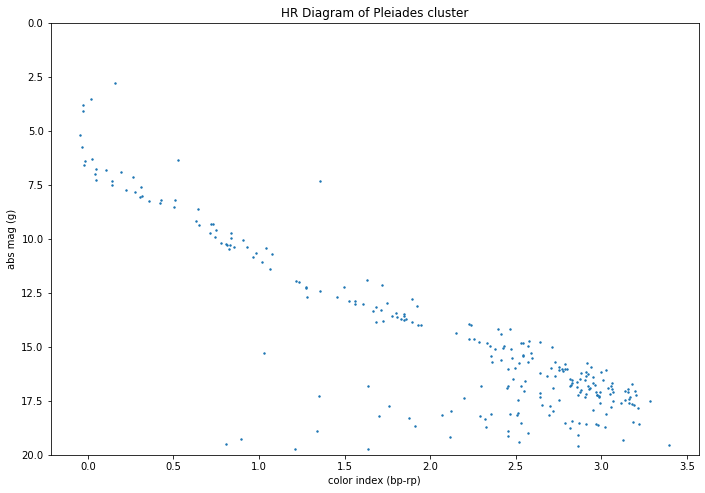

In [22]:
plt.scatter(pleiades_half['bp_rp'], pleiades_half['phot_g_mean_mag'], s=2)
plt.ylim(20, 0)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of Pleiades cluster')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

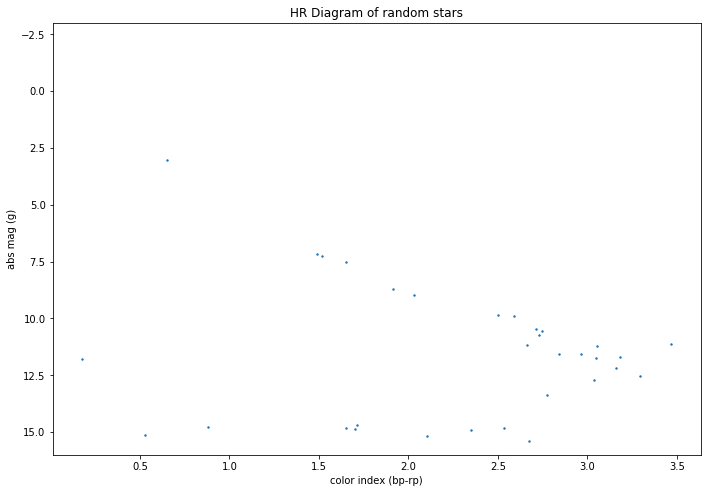

In [3]:
#random6.2-12.5.csv
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND 
#DEC between 17.5 and 18.5 AND 
#parallax > 6.2 AND parallax <= 12.5

random_half = pd.read_csv("random6.2-12.5.csv")
random_half.loc[:, 'parallax_arcsec'] = random_half['parallax'].apply(lambda x: x*.001)
random_half.loc[:, 'R'] = random_half['parallax_arcsec'].apply(distance)
random_half.loc[:, 'magnitude'] = random_half.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(random_half['bp_rp'], random_half['magnitude'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of random stars')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

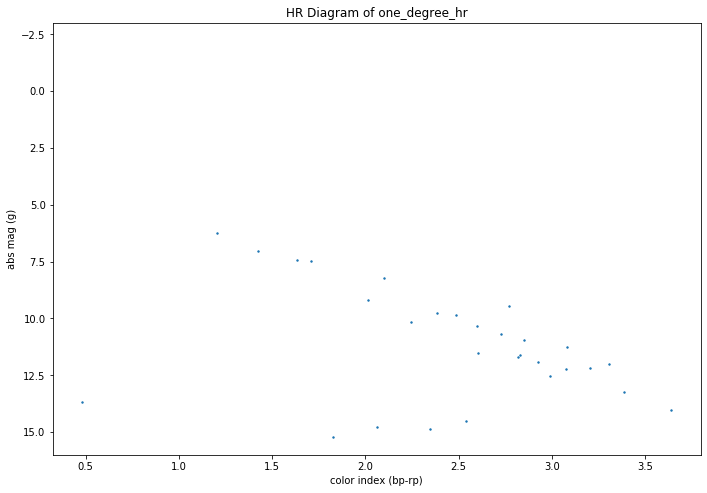

In [4]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 10 and 11 AND
#DEC between 0 and 1 AND
#parallax > 6.2 AND parallax <= 12.5

one_degree_hr = pd.read_csv("one-degree-hr.csv")
one_degree_hr.loc[:, 'parallax_arcsec'] = one_degree_hr['parallax'].apply(lambda x: x*.001)
one_degree_hr.loc[:, 'R'] = one_degree_hr['parallax_arcsec'].apply(distance)
one_degree_hr.loc[:, 'magnitude'] = one_degree_hr.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(one_degree_hr['bp_rp'], one_degree_hr['magnitude'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of one_degree_hr')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

#most people do apparent magnitude
#graph apparent magnitude instead of abs

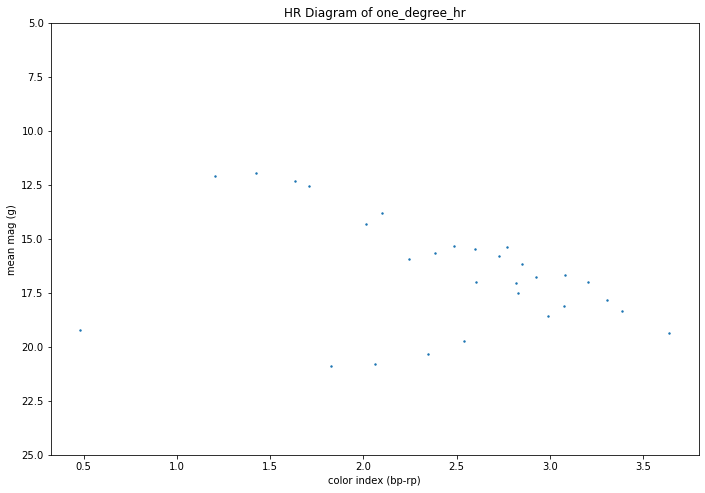

In [23]:
plt.scatter(one_degree_hr['bp_rp'], one_degree_hr['phot_g_mean_mag'], s=2)
plt.ylim(25, 5)
plt.xlabel("color index (bp-rp)")
plt.ylabel("mean mag (g)")
plt.title('HR Diagram of one_degree_hr')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

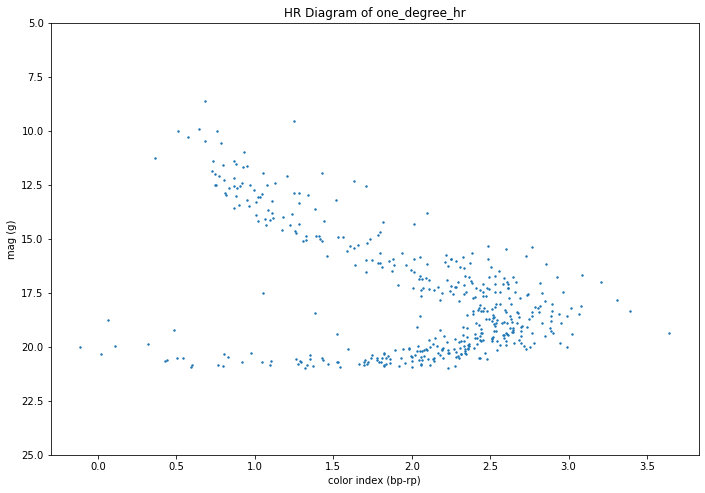

In [27]:
one_degree_hr = pd.read_csv("one_degree_bigger.csv")
one_degree_hr.loc[:, 'parallax_arcsec'] = one_degree_hr['parallax'].apply(lambda x: x*.001)
one_degree_hr.loc[:, 'R'] = one_degree_hr['parallax_arcsec'].apply(distance)
one_degree_hr.loc[:, 'magnitude'] = one_degree_hr.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(one_degree_hr['bp_rp'], one_degree_hr['phot_g_mean_mag'], s=2)
plt.ylim(25, 5)
plt.xlabel("color index (bp-rp)")
plt.ylabel("mag (g)")
plt.title('HR Diagram of one_degree_hr')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

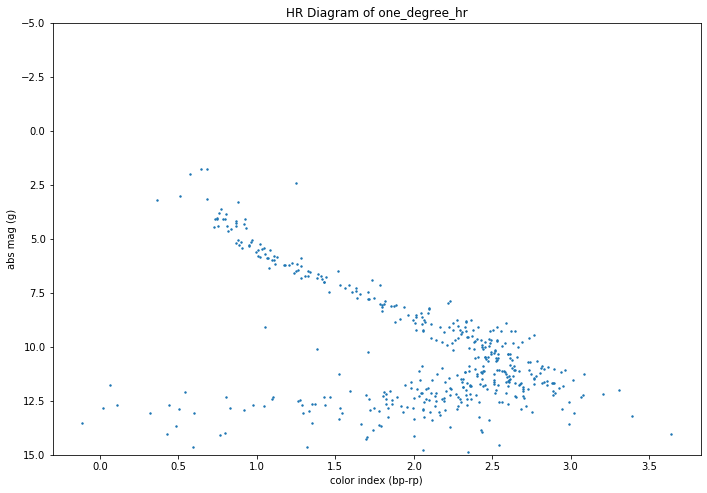

In [29]:
plt.scatter(one_degree_hr['bp_rp'], one_degree_hr['magnitude'], s=2)
plt.ylim(15, -5)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of one_degree_hr')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

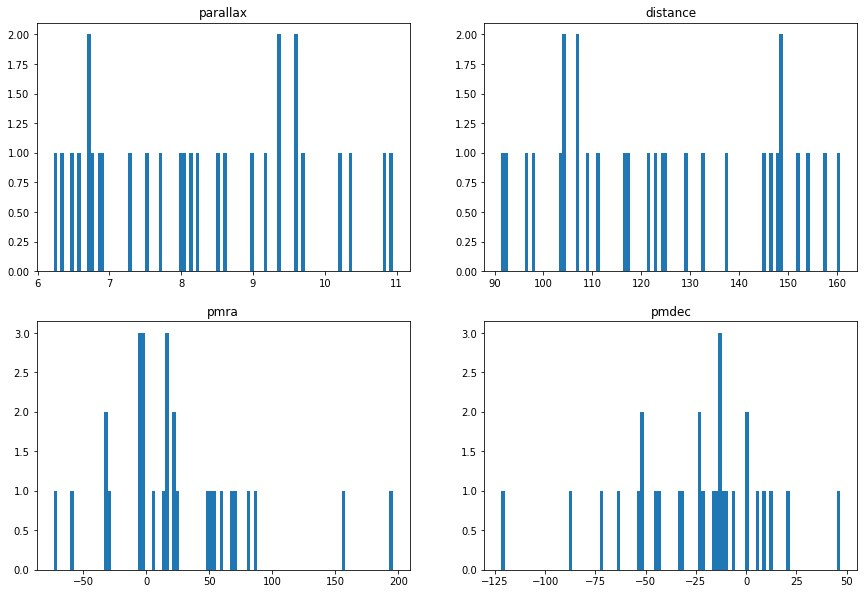

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(one_degree_hr['parallax'], bins=100)
#axs[0, 0].set_xlim(6.3, 8)
axs[0, 0].set_title('parallax')
axs[0, 1].hist(one_degree_hr['R'], bins=100)
axs[0, 1].set_title('distance')
axs[1, 0].hist(one_degree_hr['pmra'], bins=100)
#axs[1, 0].set_xlim(15, 25)
axs[1, 0].set_title('pmra')
axs[1, 1].hist(one_degree_hr['pmdec'], bins=100)
#axs[1, 1].set_xlim(-52, -37)
axs[1, 1].set_title('pmdec')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

In [6]:
data = pleiades_half[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l', 'parallax_arcsec', 'R', 'magnitude']]
data.head(10)

,ra,dec,parallax,parallax_error,pmra,pmdec,b,l,parallax_arcsec,R,magnitude
0,56.426427,24.069631,7.672955,0.309783,18.768578,-45.855762,-23.754386,166.366221,0.007673,130.327882,13.339196
1,56.397580,24.083017,7.503007,0.196249,18.630585,-44.978247,-23.762094,166.335059,0.007503,133.279903,4.357839
2,56.666838,23.782747,7.267479,0.092439,18.633386,-43.556209,-23.819259,166.754730,0.007267,137.599294,10.422443
3,56.517996,23.927848,7.091920,0.087904,18.651298,-43.322361,-23.803413,166.537950,0.007092,141.005532,10.000360
4,56.559782,23.850619,7.283831,0.208350,18.505357,-44.841335,-23.834944,166.625602,0.007284,137.290389,12.415345
5,56.657094,23.787516,7.399871,0.051173,20.009694,-47.311236,-23.821738,166.744014,0.007400,135.137488,4.384155
6,56.732490,23.939878,7.080585,0.120412,19.974366,-42.211999,-23.662668,166.687617,0.007081,141.231268,10.791993
7,56.412163,23.815393,7.525286,0.203602,19.470645,-45.380966,-23.951731,166.542055,0.007525,132.885323,12.474406
8,56.373316,23.760309,7.258553,0.038388,19.287093,-45.697785,-24.016427,166.553656,0.007259,137.768505,7.170271
9,56.414281,23.754102,7.346931,0.223131,22.762672,-45.469300,-23.995868,166.588646,0.007347,136.111255,6.219912


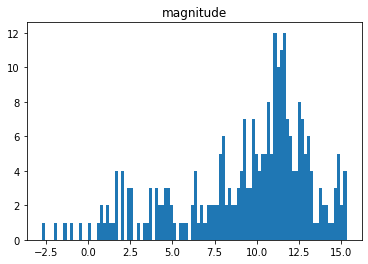

In [7]:
plt.hist(data['magnitude'], bins=100)
plt.title("magnitude")
plt.show()

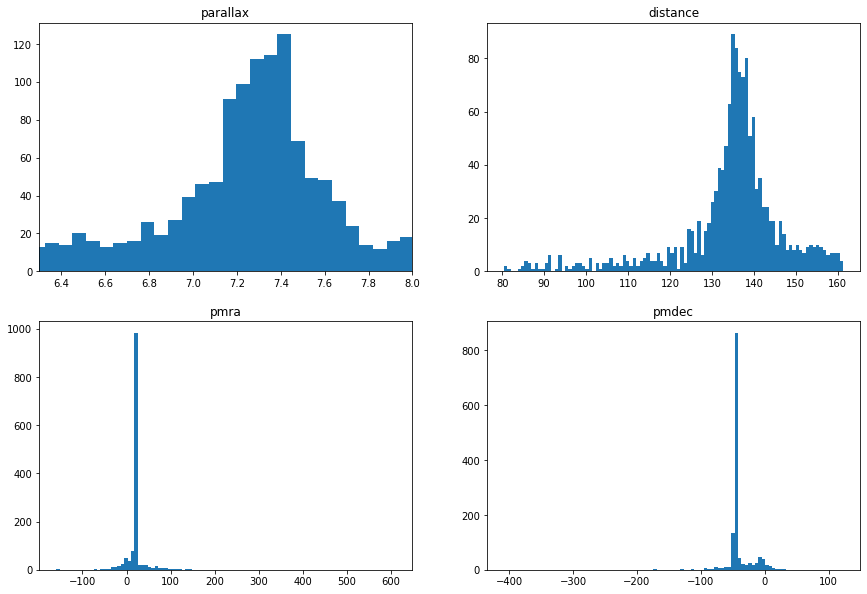

In [30]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(data['parallax'], bins=100)
axs[0, 0].set_xlim(6.3, 8)
axs[0, 0].set_title('parallax')
axs[0, 1].hist(data['R'], bins=100)
axs[0, 1].set_title('distance')
axs[1, 0].hist(data['pmra'], bins=100)
#axs[1, 0].set_xlim(15, 25)
axs[1, 0].set_title('pmra')
axs[1, 1].hist(data['pmdec'], bins=100)
#axs[1, 1].set_xlim(-52, -37)
axs[1, 1].set_title('pmdec')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

In [9]:
def parallax_trimmed(x):
    if x < 9:
        return x

def distance_trimmed(x):
    if x > 120 and x < 150:
        return x
    
def pmra_trimmed(x):
    if x > 15 and x < 25:
        return x
    
def pmdec_trimmed(x):
    if x > -52 and x < -37:
        return x

In [10]:
pleiades_half.loc[:, 'parallax_trimmed'] = pleiades_half['parallax'].apply(parallax_trimmed)
pleiades_half.loc[:, 'distance_trimmed'] = pleiades_half['R'].apply(distance_trimmed)
pleiades_half.loc[:, 'pmra_trimmed'] = pleiades_half['pmra'].apply(pmra_trimmed)
pleiades_half.loc[:, 'pmdec_trimmed'] = pleiades_half['pmdec'].apply(pmdec_trimmed)

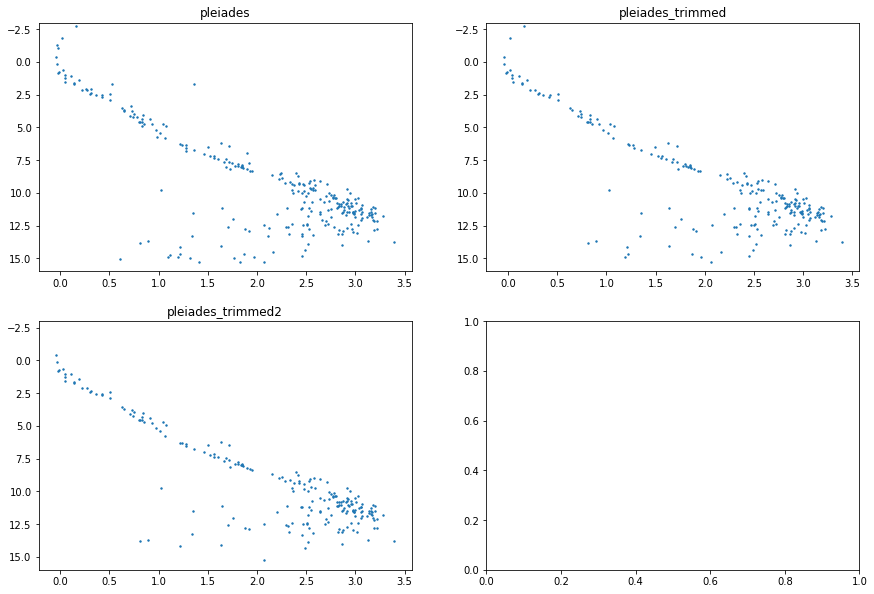

In [11]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND 
#DEC between 23.65 and 24.65 AND 
#parallax > 6.2 AND parallax < 9 AND 
#pmra > 5 AND pmra < 35 AND 
#pmdec > -50 AND pmdec < -35
pleiades_trimmed = pd.read_csv("pleiades_trimmed.csv")
pleiades_trimmed.loc[:, 'parallax_arcsec'] = pleiades_trimmed['parallax'].apply(lambda x: x*.001)
pleiades_trimmed.loc[:, 'R'] = pleiades_trimmed['parallax_arcsec'].apply(distance)
pleiades_trimmed.loc[:, 'magnitude'] = pleiades_trimmed.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)


#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 23.65 and 24.65 AND
#parallax > 6.3 AND parallax < 8 AND
#pmra > 15 AND pmra < 25 AND
#pmdec > -50 AND pmdec < -35
pleiades_trimmed2 = pd.read_csv("pleiades_trimmed2.csv")
pleiades_trimmed2.loc[:, 'parallax_arcsec'] = pleiades_trimmed2['parallax'].apply(lambda x: x*.001)
pleiades_trimmed2.loc[:, 'R'] = pleiades_trimmed2['parallax_arcsec'].apply(distance)
pleiades_trimmed2.loc[:, 'magnitude'] = pleiades_trimmed2.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(pleiades_half['bp_rp'], pleiades_half['magnitude'], s=2)
axs[0, 0].set_ylim(16, -3)
axs[0, 0].set_title('pleiades')
axs[0, 1].scatter(pleiades_trimmed['bp_rp'], pleiades_trimmed['magnitude'], s=2)
axs[0, 1].set_ylim(16, -3)
axs[0, 1].set_title('pleiades_trimmed')
axs[1, 0].scatter(pleiades_trimmed2['bp_rp'], pleiades_trimmed2['magnitude'], s=2)
axs[1, 0].set_ylim(16, -3)
axs[1, 0].set_title('pleiades_trimmed2')
#axs[1, 1].scatter(pleiades_2_degrees['bp_rp'], pleiades_2_degrees['magnitude'], s=2)
#axs[1, 1].set_ylim(16, -3)
#axs[1, 1].set_title('pleiades_2_degrees')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

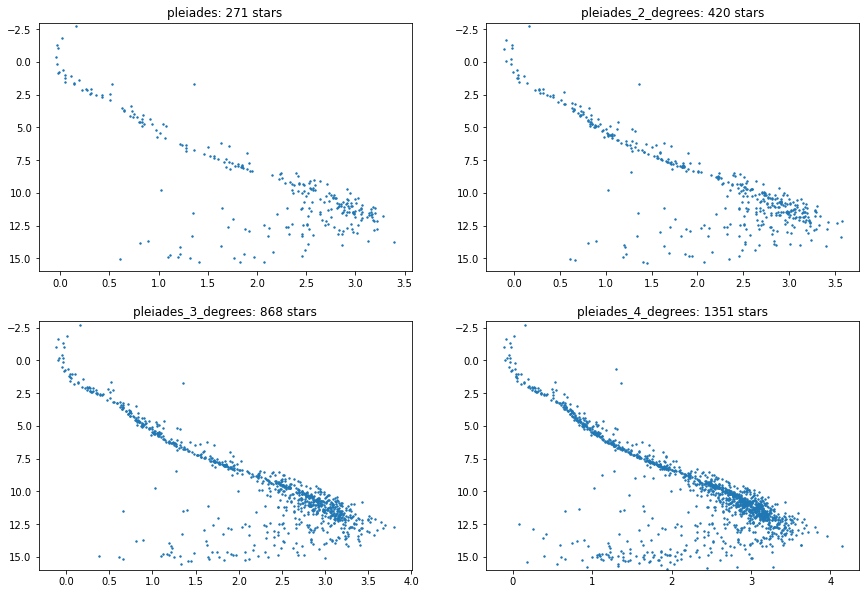

In [12]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56 and 57 AND
#DEC between 23 and 25 AND
#parallax > 6.2 AND parallax < 12.5
pleiades_2_degrees = pd.read_csv("pleiades_2_degrees.csv")
pleiades_2_degrees.loc[:, 'parallax_arcsec'] = pleiades_2_degrees['parallax'].apply(lambda x: x*.001)
pleiades_2_degrees.loc[:, 'R'] = pleiades_2_degrees['parallax_arcsec'].apply(distance)
pleiades_2_degrees.loc[:, 'magnitude'] = pleiades_2_degrees.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

#SELECT * from gaiadr2.gaia_source where 
#RA between 55.5 and 57.5 AND
#DEC between 22.5 and 25.5 AND
#parallax > 6.2 AND parallax < 12.5
pleiades_3_degrees = pd.read_csv("pleiades_3_degrees.csv")
pleiades_3_degrees.loc[:, 'parallax_arcsec'] = pleiades_3_degrees['parallax'].apply(lambda x: x*.001)
pleiades_3_degrees.loc[:, 'R'] = pleiades_3_degrees['parallax_arcsec'].apply(distance)
pleiades_3_degrees.loc[:, 'magnitude'] = pleiades_3_degrees.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

#SELECT * from gaiadr2.gaia_source where 
#RA between 55 and 58 AND
#DEC between 22 and 26 AND
#parallax > 6.2 AND parallax < 12.5
pleiades_4_degrees = pd.read_csv("pleiades_4_degrees.csv")
pleiades_4_degrees.loc[:, 'parallax_arcsec'] = pleiades_4_degrees['parallax'].apply(lambda x: x*.001)
pleiades_4_degrees.loc[:, 'R'] = pleiades_4_degrees['parallax_arcsec'].apply(distance)
pleiades_4_degrees.loc[:, 'magnitude'] = pleiades_4_degrees.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(pleiades_half['bp_rp'], pleiades_half['magnitude'], s=2)
axs[0, 0].set_ylim(16, -3)
axs[0, 0].set_title('pleiades: 271 stars')
axs[0, 1].scatter(pleiades_2_degrees['bp_rp'], pleiades_2_degrees['magnitude'], s=2)
axs[0, 1].set_ylim(16, -3)
axs[0, 1].set_title('pleiades_2_degrees: 420 stars')
axs[1, 0].scatter(pleiades_3_degrees['bp_rp'], pleiades_3_degrees['magnitude'], s=2)
axs[1, 0].set_ylim(16, -3)
axs[1, 0].set_title('pleiades_3_degrees: 868 stars')
axs[1, 1].scatter(pleiades_4_degrees['bp_rp'], pleiades_4_degrees['magnitude'], s=2)
axs[1, 1].set_ylim(16, -3)
axs[1, 1].set_title('pleiades_4_degrees: 1351 stars')
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

In [13]:
pleiades_half.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,lum_val,lum_percentile_lower,lum_percentile_upper,parallax_arcsec,R,magnitude,parallax_trimmed,distance_trimmed,pmra_trimmed,pmdec_trimmed
count,2.710000e+02,2.710000e+02,2.710000e+02,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,77.000000,77.000000,77.000000,271.000000,271.000000,271.000000,261.000000,240.000000,232.000000,234.000000
mean,1.635721e+18,6.599313e+16,7.883163e+08,2015.5,56.801511,0.239726,24.153006,0.136650,7.427254,0.266068,...,13.844219,12.247752,15.440686,0.007427,135.515117,9.338381,7.325184,136.252905,19.736681,-45.301464
std,0.000000e+00,7.696027e+14,4.975334e+08,0.0,0.274852,0.412282,0.276752,0.205050,0.660701,0.459678,...,101.604336,87.863038,115.348250,0.000661,10.063738,3.916633,0.384902,5.012450,1.327245,1.734658
min,1.635721e+18,6.499966e+16,2.319040e+06,2015.5,56.352970,0.022016,23.651585,0.012354,6.352452,0.023472,...,0.035288,0.034589,0.035706,0.006352,86.411612,-2.719986,6.352452,120.919303,15.158053,-49.907228
25%,1.635721e+18,6.521285e+16,3.823374e+08,2015.5,56.559842,0.061147,23.944590,0.034913,7.165214,0.066065,...,0.093271,0.092089,0.095334,0.007165,132.842300,7.421846,7.160426,133.647024,18.964825,-46.265631
50%,1.635721e+18,6.651747e+16,6.924173e+08,2015.5,56.791985,0.113055,24.136505,0.067698,7.337710,0.127062,...,0.327849,0.316560,0.339138,0.007338,136.282299,10.580900,7.322030,136.291317,19.706132,-45.382755
75%,1.635721e+18,6.673490e+16,1.227461e+09,2015.5,57.027242,0.209061,24.378576,0.124202,7.527723,0.228945,...,1.886981,1.866937,1.907025,0.007528,139.563174,11.920351,7.483064,139.163769,20.440896,-44.457216
max,1.635721e+18,6.680362e+16,1.674032e+09,2015.5,57.340945,3.355004,24.646092,1.194955,11.572519,3.731861,...,893.126300,772.421940,1013.830600,0.011573,157.419532,15.321231,8.831824,149.248850,24.878777,-37.832457


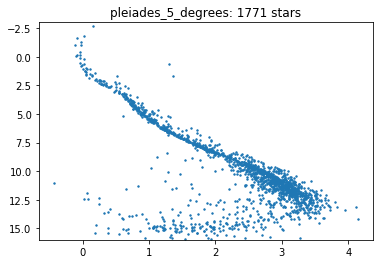

<Figure size 432x288 with 0 Axes>

In [14]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 54.5 and 58.5 AND
#DEC between 21.5 and 26.5 AND
#parallax > 6.2 AND parallax < 12.5
pleiades_5_degrees = pd.read_csv("pleiades_5_degrees.csv")
pleiades_5_degrees.loc[:, 'parallax_arcsec'] = pleiades_5_degrees['parallax'].apply(lambda x: x*.001)
pleiades_5_degrees.loc[:, 'R'] = pleiades_5_degrees['parallax_arcsec'].apply(distance)
pleiades_5_degrees.loc[:, 'magnitude'] = pleiades_5_degrees.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(pleiades_5_degrees['bp_rp'], pleiades_5_degrees['magnitude'], s=2)
plt.ylim(16, -3)
plt.title('pleiades_5_degrees: 1771 stars')
plt.show()
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

The 4 degree box around pleiades appears to be the best.

I'm going to take that plot and try to trim it below like I did with the one degree box.

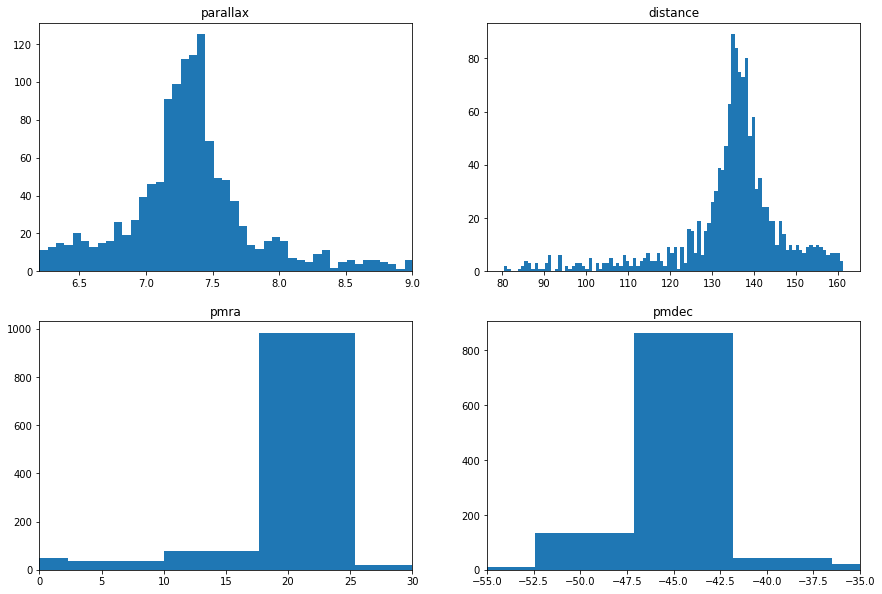

In [15]:
data = pleiades_4_degrees[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l', 'parallax_arcsec', 'R', 'magnitude']]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(data['parallax'], bins=100)
axs[0, 0].set_xlim(6.2, 9)
axs[0, 0].set_title('parallax')
axs[0, 1].hist(data['R'], bins=100)
axs[0, 1].set_title('distance')
axs[1, 0].hist(data['pmra'], bins=100)
axs[1, 0].set_xlim(0, 30)
axs[1, 0].set_title('pmra')
axs[1, 1].hist(data['pmdec'], bins=100)
axs[1, 1].set_xlim(-55, -35)
axs[1, 1].set_title('pmdec')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

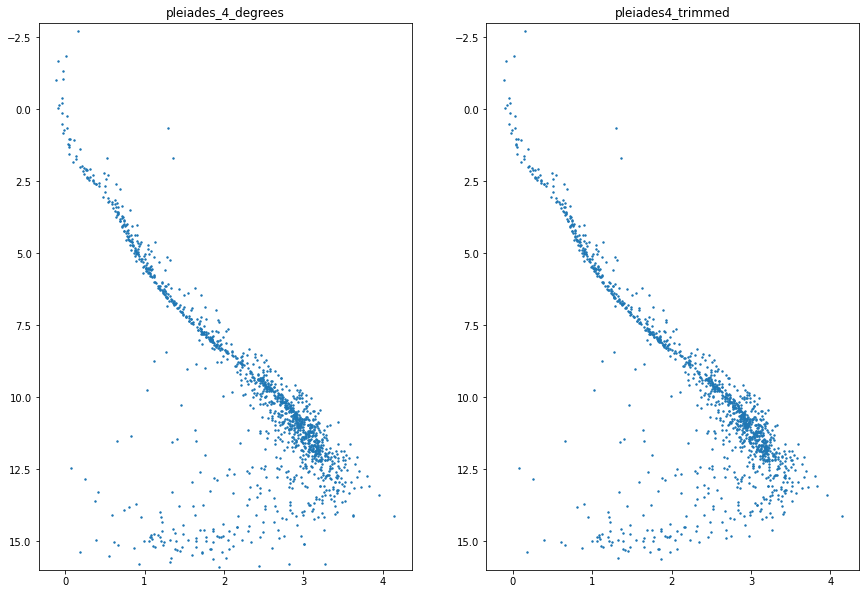

In [16]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 55 and 58 AND
#DEC between 22 and 26 AND
#parallax > 6.2 AND parallax < 9 AND
#pmra > -100 AND pmra < 100 AND
#pmdec > -100 AND pmdec < 50
pleiades4_trimmed = pd.read_csv("pleiades4_trimmed.csv")
pleiades4_trimmed.loc[:, 'parallax_arcsec'] = pleiades4_trimmed['parallax'].apply(lambda x: x*.001)
pleiades4_trimmed.loc[:, 'R'] = pleiades4_trimmed['parallax_arcsec'].apply(distance)
pleiades4_trimmed.loc[:, 'magnitude'] = pleiades4_trimmed.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

fig, axs = plt.subplots(1, 2)
axs[0].scatter(pleiades_4_degrees['bp_rp'], pleiades_4_degrees['magnitude'], s=2)
axs[0].set_ylim(16, -3)
axs[0].set_title('pleiades_4_degrees')
axs[1].scatter(pleiades4_trimmed['bp_rp'], pleiades4_trimmed['magnitude'], s=2)
axs[1].set_ylim(16, -3)
axs[1].set_title('pleiades4_trimmed')
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

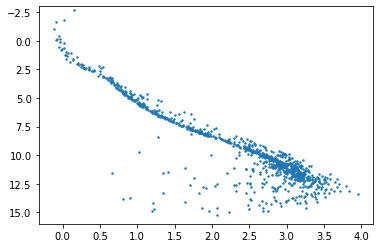

In [17]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 55 and 58 AND
#DEC between 22 and 26 AND
#parallax > 6.2 AND parallax < 9 AND
#pmra > 0 AND pmra < 30 AND
#pmdec > -55 AND pmdec < -35
pleiades4_trimmed_more = pd.read_csv("pleiades4_trimmed_more.csv")
pleiades4_trimmed_more.loc[:, 'parallax_arcsec'] = pleiades4_trimmed_more['parallax'].apply(lambda x: x*.001)
pleiades4_trimmed_more.loc[:, 'R'] = pleiades4_trimmed_more['parallax_arcsec'].apply(distance)
pleiades4_trimmed_more.loc[:, 'magnitude'] = pleiades4_trimmed_more.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
plt.scatter(pleiades4_trimmed_more['bp_rp'], pleiades4_trimmed_more['magnitude'], s=2)
plt.ylim(16, -3)
plt.show()

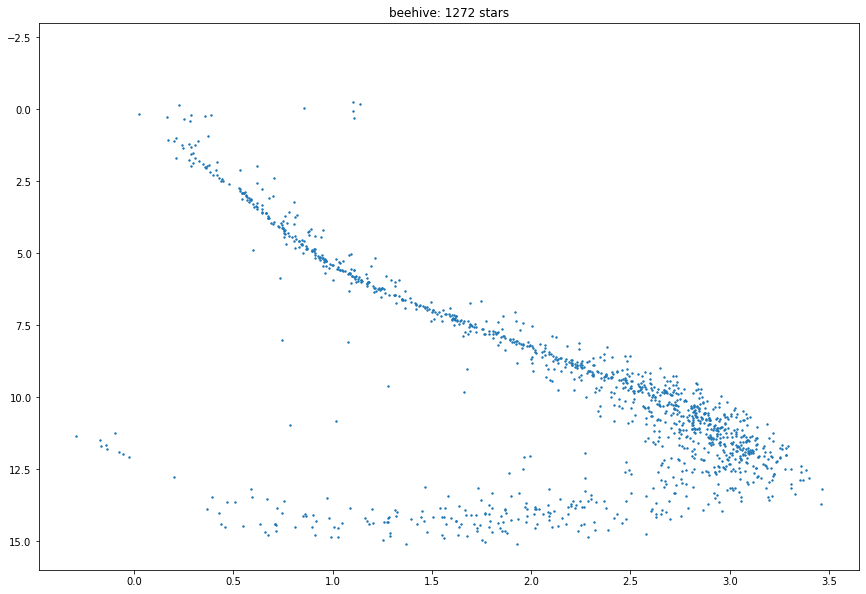

In [18]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 128.5 and 131.5 AND
#DEC between 18.5 and 21.5 AND
#parallax > 4.55 AND parallax < 7.14

beehive = pd.read_csv("beehive3.csv")
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'magnitude'] = beehive.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(beehive['bp_rp'], beehive['magnitude'], s=2)
plt.ylim(16, -3)
plt.title('beehive: 1272 stars')

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()